In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Cleaning:

## *Federal Funds Interest Rate*

In [ ]:
import pandas as pd     #Import the pandas library for data manipulation and analysis
import seaborn as sns   #Import seaborn for data visualization

#Federal Funds Rate
path="/content/drive/MyDrive/CS625/FEDFUNDS.csv"    #File path to CSV file containing Federal Funds Rate data
fed_funds_rate = pd.read_csv(path)                  #Read the CSV file using pandas and store the data in 'fed_funds_rate' DataFrame
fed_funds_rate['DATE'] = pd.to_datetime(fed_funds_rate['DATE'])       #Convert the 'DATE' column to a datetime object for proper time series analysis
fed_funds_rate.head()     #Display first five rows

,DATE,FEDFUNDS
0,1999-08-01,5.07
1,1999-09-01,5.22
2,1999-10-01,5.20
3,1999-11-01,5.42
4,1999-12-01,5.30


##*Unemployment Rate*

In this dataframe, multiple columns were removed because the visualization requires only two pieces of information: the date, formatted as 'year-mm-dd', and the corresponding value for each month.

In [ ]:
#Unemployment Rate
path="/content/drive/MyDrive/CS625/unemployment-rate.csv"     #File path to CSV file containing Unemployment Rate data
us_unemployment_rate = pd.read_csv(path)                      #Read the CSV file using pandas and store the data in 'us_unemployment_rate' DataFrame
us_unemployment_rate['Label'] = pd.to_datetime(us_unemployment_rate['Label'])   #Convert the 'Label' column to a datetime object for proper time series analysis
us_unemployment_rate.head()

,Series ID,Year,Period,Label,Value
0,LNS14000000,2000,M01,2000-01-01,4.0
1,LNS14000000,2000,M02,2000-02-01,4.1
2,LNS14000000,2000,M03,2000-03-01,4.0
3,LNS14000000,2000,M04,2000-04-01,3.8
4,LNS14000000,2000,M05,2000-05-01,4.0


In [ ]:
us_unemployment_rate = us_unemployment_rate.drop(['Period','Year','Series ID'], axis=1)       #Remove unnecessary columns:'Period','Year','Series ID'
us_unemployment_rate = us_unemployment_rate.rename(columns={'Label': 'DATE', 'Value': 'Unemployment Rate'})       #Rename 'Label' column to 'DATE' and 'Value' column to 'Unemployment Rate' to provide clarity
us_unemployment_rate.head()

,DATE,Unemployment Rate
0,2000-01-01,4.0
1,2000-02-01,4.1
2,2000-03-01,4.0
3,2000-04-01,3.8
4,2000-05-01,4.0


##*Real GDP*

Given that the 'real_GDP' dataframe provides quarterly data while the visualization requires monthly information, we must interpolate the 'real_GDP' data to align it with the monthly data requirement. This will enable us to create a new dataframe that provides monthly real GDP data.

In [ ]:
#Real GDP
path="/content/drive/MyDrive/CS625/GDPC1.csv"
real_GDP = pd.read_csv(path)
real_GDP['DATE'] = pd.to_datetime(real_GDP['DATE'])     #Convert the 'DATE' column to a datetime object for proper time series analysis
real_GDP.head()

,DATE,GDPC1
0,1947-01-01,2182.681
1,1947-04-01,2176.892
2,1947-07-01,2172.432
3,1947-10-01,2206.452
4,1948-01-01,2239.682


In [ ]:
real_GDP['DATE'] = pd.to_datetime(real_GDP['DATE']).dt.to_period('Q')   #Convert 'DATE' to quarterly period
real_GDP.head()

,DATE,GDPC1
0,1947Q1,2182.681
1,1947Q2,2176.892
2,1947Q3,2172.432
3,1947Q4,2206.452
4,1948Q1,2239.682


In [ ]:
real_GDP = real_GDP.set_index('DATE').resample('M').asfreq()    #Set 'DATE' as index and resample to monthly frequency
real_GDP.head()

,GDPC1
DATE,
1947-01,2182.681
1947-02,NaN
1947-03,NaN
1947-04,2176.892
1947-05,NaN


In [ ]:
real_GDP = real_GDP.interpolate(method='linear')    #Interpolate missing values
real_GDP.head()

,GDPC1
DATE,
1947-01,2182.681000
1947-02,2180.751333
1947-03,2178.821667
1947-04,2176.892000
1947-05,2175.405333


In [ ]:
real_GDP.index = real_GDP.index.to_timestamp()  #Convert index back to datetime, setting it to the first of each month
real_GDP.head()

,GDPC1
DATE,
1947-01-01,2182.681000
1947-02-01,2180.751333
1947-03-01,2178.821667
1947-04-01,2176.892000
1947-05-01,2175.405333


In [ ]:
real_GDP = real_GDP.reset_index()   #Reset index to move 'DATE' back to a column
real_GDP.head()

,DATE,GDPC1
0,1947-01-01,2182.681000
1,1947-02-01,2180.751333
2,1947-03-01,2178.821667
3,1947-04-01,2176.892000
4,1947-05-01,2175.405333


##*Combining Above DataFrames into One DataFrame*

To combine multiple dataframes into one in Python using pandas, use the 'merge' function, specifying the dataframes to be joined and the column on which to join them, which is 'DATE'.

In [ ]:
facet_chart_data = pd.merge(fed_funds_rate, us_unemployment_rate, on='DATE')
facet_chart_data = pd.merge(facet_chart_data, real_GDP, on='DATE')
facet_chart_data.head()

,DATE,FEDFUNDS,Unemployment Rate,GDPC1
0,2000-01-01,5.45,4.0,13878.147000
1,2000-02-01,5.73,4.1,13962.400667
2,2000-03-01,5.85,4.0,14046.654333
3,2000-04-01,6.02,3.8,14130.908000
4,2000-05-01,6.27,4.0,14135.709333


## *Dot-com Recession DataFrame*

###March - November 2001

In [ ]:
#--------------------------
#  Dot-com Recession Data
#--------------------------
#Convert strings to datetime objects for the recession & its recovery period
start_date_0 = pd.to_datetime('2001-01-01')
end_date_0 = pd.to_datetime('2006-01-01')

dotcom_recession = facet_chart_data.copy()    #Copy the original merged dataset to a new dataframe for processing the dotcom recession data
dotcom_recession = dotcom_recession[(dotcom_recession['DATE'] >= start_date_0) & (dotcom_recession['DATE'] <= end_date_0)]    #Filter the dataset to include only the dates within the dotcom recession period
dotcom_recession = dotcom_recession.reset_index(drop=True)    #Reset the index of the dataframe for consistency and clean formatting

recovery_start_date_0 = pd.to_datetime('2001-12-01')    #Define the start date (or first month) of the recovery period from the dotcom recession, which will be 'Month 0'.

#Calculate the difference in months from the beginning of the recovery period and add it as a new column in the dataframe
dotcom_recession['Months From Beginning of Recovery'] = ((dotcom_recession['DATE'].dt.to_period('M') - recovery_start_date_0.to_period('M')).apply(lambda x: x.n))
'''
More information about the calculation of 'Months From Beginning of Recovery' column.
.dt: a pandas accessor for datetime properties
.to_period('M'): converts the datetime objects in the 'DATE' column and the 'recovery_start_date_0' to a Period object at a monthly frequency, which represents the dates in terms of months, stripping away day-level detail.
.apply(lambda x: x.n): applies a function to each item in the result that extracts the number n from each Period object, which is the integer value representing the number of months.
'''

month_before_recession = dotcom_recession['GDPC1'][1]

#Calculate the percentage difference in GDP from the baseline value (14212.644667 from the month before the recession) and add it as a new column to show the change in GDP over time during the recession
dotcom_recession['GDP_Difference'] = ((dotcom_recession['GDPC1'] - month_before_recession)/month_before_recession) * 100

dotcom_recession.head(50)


,DATE,FEDFUNDS,Unemployment Rate,GDPC1,Months From Beginning of Recovery,GDP_Difference
0,2001-01-01,5.98,4.2,14183.120000,-11,-0.207735
1,2001-02-01,5.49,4.2,14212.644667,-10,0.000000
2,2001-03-01,5.31,4.3,14242.169333,-9,0.207735
3,2001-04-01,4.80,4.4,14271.694000,-8,0.415470
4,2001-05-01,4.21,4.3,14252.634667,-7,0.281369
5,2001-06-01,3.97,4.5,14233.575333,-6,0.147268
6,2001-07-01,3.77,4.6,14214.516000,-5,0.013167
7,2001-08-01,3.65,4.9,14227.535333,-4,0.104771
8,2001-09-01,3.07,5.0,14240.554667,-3,0.196374
9,2001-10-01,2.49,5.3,14253.574000,-2,0.287978


## *Great Recession DataFrame*
###December 2007 – June 2009

In [ ]:
#--------------------------
#  Great Recession Data
#--------------------------
#Convert strings to datetime objects for the recession & its recovery period
start_date = pd.to_datetime('2007-10-01')
end_date = pd.to_datetime('2020-01-01')

great_recession = facet_chart_data.copy()   #Copy the original merged dataset to a new dataframe for processing the great recession data
great_recession = great_recession[(great_recession['DATE'] >= start_date) & (great_recession['DATE'] <= end_date)]    #Filter the dataset to include only the dates within the great recession period
great_recession = great_recession.reset_index(drop=True)    #Reset the index of the dataframe for consistency and clean formatting

recovery_start_date = pd.to_datetime('2009-07-01')    #Define the start date (or first month) of the recovery period from the great recession, which will be 'Month 0'.

#Calculate the difference in months from the beginning of the recovery period and add it as a new column in the dataframe
great_recession['Months From Beginning of Recovery'] = ((great_recession['DATE'].dt.to_period('M') - recovery_start_date.to_period('M')).apply(lambda x: x.n))

great_recession = great_recession[:142]    #Shorten the dataframe

month_before_recession = great_recession['GDPC1'][1]

#Calculate the percentage difference in GDP from the baseline value (16891.128333 from the month before the recession) and add it as a new column to show the change in GDP over time during the recession
great_recession['GDP_Difference'] = ((great_recession['GDPC1'] - month_before_recession)/month_before_recession) * 100

great_recession.head(50)

,DATE,FEDFUNDS,Unemployment Rate,GDPC1,Months From Beginning of Recovery,GDP_Difference
0,2007-10-01,4.76,4.7,16915.191000,-21,0.142457
1,2007-11-01,4.49,4.7,16891.128333,-20,0.000000
2,2007-12-01,4.24,5.0,16867.065667,-19,-0.142457
3,2008-01-01,3.94,5.0,16843.003000,-18,-0.284915
4,2008-02-01,2.98,4.9,16876.432333,-17,-0.087004
5,2008-03-01,2.61,5.1,16909.861667,-16,0.110906
6,2008-04-01,2.28,5.0,16943.291000,-15,0.308817
7,2008-05-01,1.98,5.4,16913.625667,-14,0.133190
8,2008-06-01,2.00,5.6,16883.960333,-13,-0.042436
9,2008-07-01,2.01,5.8,16854.295000,-12,-0.218063


##*COVID Recession DataFrame*

###March - April 2020

In [ ]:
#--------------------------
#  COVID Recession Data
#--------------------------
#Convert strings to datetime objects for the recession & its recovery period
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2023-07-01')

covid_recession = facet_chart_data.copy()   #Copy the original merged dataset to a new dataframe for processing the covid recession data
covid_recession = covid_recession[(covid_recession['DATE'] >= start_date) & (covid_recession['DATE'] <= end_date)]    #Filter the dataset to include only the dates within the covid recession period
covid_recession = covid_recession.reset_index(drop=True)    #Reset the index of the dataframe for consistency and clean formatting

recovery_start_date = pd.to_datetime('2020-05-01')    #Define the start date (or first month) of the recovery period from the covid recession, which will be 'Month 0'.

#Calculate the difference in months from the beginning of the recovery period and add it as a new column in the dataframe
covid_recession['Months From Beginning of Recovery'] = ((covid_recession['DATE'].dt.to_period('M') - recovery_start_date.to_period('M')).apply(lambda x: x.n))

month_before_recession = covid_recession['GDPC1'][0]

#Calculate the percentage difference in GDP from the baseline value (20665.553000 from the month before the recession) and add it as a new column to show the change in GDP over time during the recession
covid_recession['GDP_Difference'] = ((covid_recession['GDPC1'] - month_before_recession)/month_before_recession) * 100

covid_recession.head(50)

,DATE,FEDFUNDS,Unemployment Rate,GDPC1,Months From Beginning of Recovery,GDP_Difference
0,2020-01-01,1.55,3.5,20665.553000,-4,0.000000
1,2020-02-01,1.58,3.5,20121.978667,-3,-2.630340
2,2020-03-01,0.65,4.4,19578.404333,-2,-5.260680
3,2020-04-01,0.05,14.7,19034.830000,-1,-7.891020
4,2020-05-01,0.05,13.2,19527.148333,0,-5.508707
5,2020-06-01,0.08,11.0,20019.466667,1,-3.126393
6,2020-07-01,0.09,10.2,20511.785000,2,-0.744079
7,2020-08-01,0.10,8.4,20582.566000,3,-0.401572
8,2020-09-01,0.09,7.9,20653.347000,4,-0.059064
9,2020-10-01,0.09,6.9,20724.128000,5,0.283443


#Create the Final Visualization, a Facet Chart:

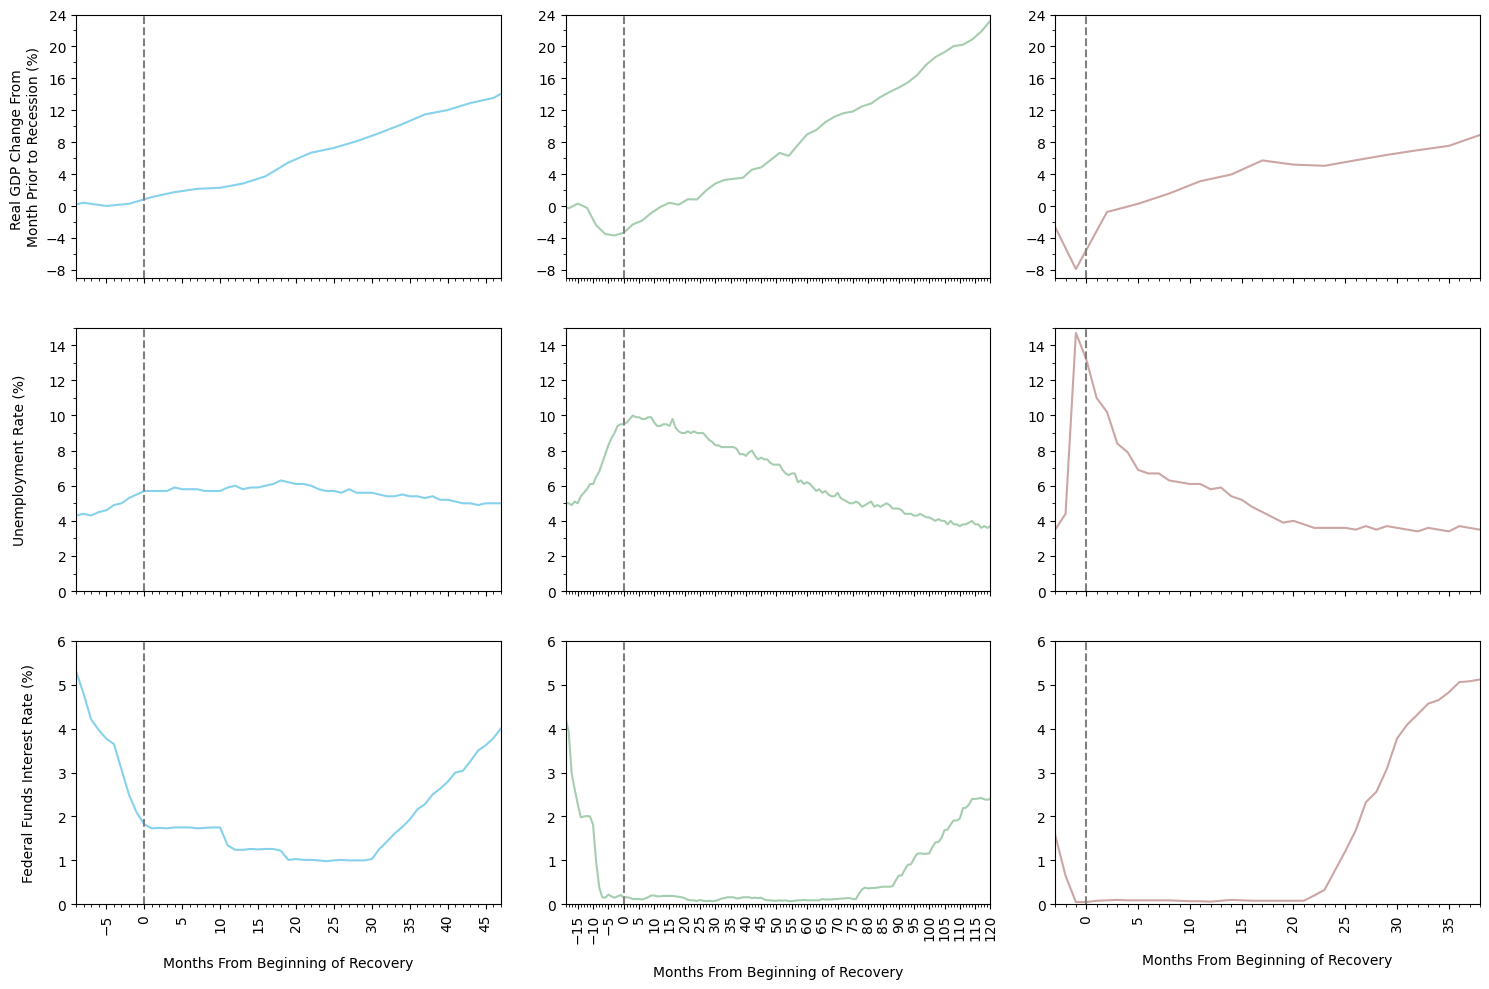

In [ ]:
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import matplotlib.pyplot as plt
import datetime

plt.figure(figsize=(15, 10))    #Create a new figure with a specified size

#--------------------------
#  Dot-com Recession Data
#--------------------------

# Top Left chart for Real Gross Domestic Product
plt.subplot(3, 3, 1)  #Overall figure contains: 3 rows, 3 columns, position 1
sns.lineplot(x='Months From Beginning of Recovery', y='GDP_Difference', data=dotcom_recession, color = '#86d1eb')
plt.xlabel(' ')
plt.ylabel('Real GDP Change From \nMonth Prior to Recession (%)')
plt.xticks(rotation=90)   # Rotate x-axis labels by 90 degrees
#Set x-axis & y-axis limits
plt.xlim(-9,47)
plt.ylim(-9,24)
plt.axvline(x=0, color='gray', linestyle='--')    # Add a vertical line at x=0
plt.gca().xaxis.set_major_locator(MultipleLocator(5))   # Set major tick intervals on x-axis
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))   # Set minor tick intervals on x-axis
plt.gca().yaxis.set_major_locator(MultipleLocator(4))   # Set major tick intervals on y-axis
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))   # Set minor tick intervals on y-axis
plt.gca().set_xticklabels([])

# Middle Left chart for Unemployment Rate
plt.subplot(3, 3, 4)  #Position 4
sns.lineplot(x='Months From Beginning of Recovery', y='Unemployment Rate', data=dotcom_recession, color = '#86d1eb')
plt.xlabel(' ')
plt.ylabel('Unemployment Rate (%)\n')
plt.xticks(rotation=90)
plt.xlim(-9,47)
plt.ylim(0,15)
plt.axvline(x=0, color='gray', linestyle='--')
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().set_xticklabels([])

# Bottom Left chart for Federal Funds Interest Rate
plt.subplot(3, 3, 7)  #Position 7
sns.lineplot(x='Months From Beginning of Recovery', y='FEDFUNDS', data=dotcom_recession, color = '#86d1eb')
plt.xlabel('\nMonths From Beginning of Recovery')
plt.ylabel('Federal Funds Interest Rate (%)\n')
plt.xticks(rotation=90)
plt.xlim(-9,47)
plt.ylim(0,6)
plt.axvline(x=0, color='gray', linestyle='--')
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(1))

#--------------------------
#  Great Recession Data
#--------------------------

# Top Middle chart for Real Gross Domestic Product
plt.subplot(3, 3, 2)  #Position 2
sns.lineplot(x='Months From Beginning of Recovery', y='GDP_Difference', data=great_recession, color = '#a6cdb0')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(rotation=90)
plt.xlim(-19,120)
plt.ylim(-9,24)
plt.axvline(x=0, color='gray', linestyle='--')
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(4))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().set_xticklabels([])

# Middle Center chart for Unemployment Rate
plt.subplot(3, 3, 5)  #Position 5
sns.lineplot(x='Months From Beginning of Recovery', y='Unemployment Rate', data=great_recession, color = '#a6cdb0')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(rotation=90)
plt.xlim(-19,120)
plt.ylim(0,15)
plt.axvline(x=0, color='gray', linestyle='--')
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().set_xticklabels([])

# Bottom Middle chart for Federal Funds Interest Rate
plt.subplot(3, 3, 8)  #Position 8
sns.lineplot(x='Months From Beginning of Recovery', y='FEDFUNDS', data=great_recession, color = '#a6cdb0')
plt.xlabel('\nMonths From Beginning of Recovery')
plt.ylabel(' ')
plt.xticks(rotation=90)
plt.xlim(-19,120)
plt.ylim(0,6)
plt.axvline(x=0, color='gray', linestyle='--')
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(1))

#--------------------------
#  COVID Recession Data
#--------------------------

# Top Right Chart for Real Gross Domestic Product
plt.subplot(3, 3, 3)  #Position 3
sns.lineplot(x='Months From Beginning of Recovery', y='GDP_Difference', data=covid_recession, color = '#cca5a5')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(rotation=90)
plt.xlim(-3,38)
plt.ylim(-9,24)
plt.axvline(x=0, color='gray', linestyle='--')
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(4))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().set_xticklabels([])

# Middle Right chart for Unemployment Rate
plt.subplot(3, 3, 6)  #Position 6
sns.lineplot(x='Months From Beginning of Recovery', y='Unemployment Rate', data=covid_recession, color = '#cca5a5')
plt.xlabel(' ')
plt.ylabel(' ')
plt.xticks(rotation=90)
plt.xlim(-3,38)
plt.ylim(0,15)
plt.axvline(x=0, color='gray', linestyle='--')
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().set_xticklabels([])

# Bottom Right chart for Federal Funds Interest Rate
plt.subplot(3, 3, 9)  #Position 9
sns.lineplot(x='Months From Beginning of Recovery', y='FEDFUNDS', data=covid_recession, color = '#cca5a5')
plt.xlabel('\nMonths From Beginning of Recovery')
plt.ylabel(' ')
plt.xticks(rotation=90)
plt.xlim(-3,38)
plt.ylim(0,6)
plt.axvline(x=0, color='gray', linestyle='--')
plt.gca().xaxis.set_major_locator(MultipleLocator(5))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.gca().yaxis.set_major_locator(MultipleLocator(1))

plt.savefig("CS625-Data-Vis.png")

plt.tight_layout()
plt.show()

#Analysis:

## **Real GDP**

To provide helpful annotations, I will be utilizing arrows to highlight key changes:

* *Red Arrows* depict "Estimated GDP Percent Change From Pre-Recession to Month 0"
* *Yellow Arrows* depict "Estimated GDP Percent Change From Pre-Recession to Current Month"

In [ ]:
# ----------Estimated GDP Percent Change From Beginning of Recession to Month 0---------------
dotcom_percent_change = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == 0]['GDP_Difference'].iloc[0]
print("---Estimated GDP Percent Change From Pre-Recession to Month 0---")
print("Dotcom Recession:", dotcom_percent_change.round(2))

great_percent_change = great_recession[great_recession['Months From Beginning of Recovery'] == 0]['GDP_Difference'].iloc[0]
print("Great Recession:", great_percent_change.round(2))

covid_percent_change = covid_recession[covid_recession['Months From Beginning of Recovery'] == 0]['GDP_Difference'].iloc[0]
print("Covid Recession:", covid_percent_change.round(2))

# ----------Estimated GDP Percent Change From Beginning of Recession to Month 10---------------
dotcom_percent_change = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == 10]['GDP_Difference'].iloc[0]
print("---Estimated GDP Percent Change From Pre-Recession to Month 10---")
print("Dotcom Recession:", dotcom_percent_change.round(2))

great_percent_change = great_recession[great_recession['Months From Beginning of Recovery'] == 10]['GDP_Difference'].iloc[0]
print("Great Recession:", great_percent_change.round(2))

covid_percent_change = covid_recession[covid_recession['Months From Beginning of Recovery'] == 10]['GDP_Difference'].iloc[0]
print("Covid Recession:", covid_percent_change.round(2))

# ----------Estimated GDP Percent Change From Beginning of Recession to Month 20---------------
dotcom_percent_change = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == 20]['GDP_Difference'].iloc[0]
print("---Estimated GDP Percent Change From Pre-Recession to Month 20---")
print("Dotcom Recession:", dotcom_percent_change.round(2))

great_percent_change = great_recession[great_recession['Months From Beginning of Recovery'] == 20]['GDP_Difference'].iloc[0]
print("Great Recession:", great_percent_change.round(2))

covid_percent_change = covid_recession[covid_recession['Months From Beginning of Recovery'] == 20]['GDP_Difference'].iloc[0]
print("Covid Recession:", covid_percent_change.round(2))

# ----------Estimated GDP Percent Change From Beginning of Recession to Month 30---------------
dotcom_percent_change = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == 30]['GDP_Difference'].iloc[0]
print("---Estimated GDP Percent Change From Pre-Recession to Month 30---")
print("Dotcom Recession:", dotcom_percent_change.round(2))

great_percent_change = great_recession[great_recession['Months From Beginning of Recovery'] == 30]['GDP_Difference'].iloc[0]
print("Great Recession:", great_percent_change.round(2))

covid_percent_change = covid_recession[covid_recession['Months From Beginning of Recovery'] == 30]['GDP_Difference'].iloc[0]
print("Covid Recession:", covid_percent_change.round(2))

---Estimated GDP Percent Change From Pre-Recession to Month 0---
Dotcom Recession: 0.85
Great Recession: -3.34
Covid Recession: -5.51
---Estimated GDP Percent Change From Pre-Recession to Month 10---
Dotcom Recession: 2.29
Great Recession: -0.62
Covid Recession: 2.6
---Estimated GDP Percent Change From Pre-Recession to Month 20---
Dotcom Recession: 5.87
Great Recession: 0.63
Covid Recession: 5.19
---Estimated GDP Percent Change From Pre-Recession to Month 30---
Dotcom Recession: 8.8
Great Recession: 2.82
Covid Recession: 6.61


## **Unemployment Rate**

To provide helpful annotations, I will be utilizing arrows to highlight key changes:

* *Red Arrows* depict "Unemployment Rate Percent Difference From Pre-Recession to Month 0"
* *Yellow Arrows* depict "Unemployment Rate Percent Difference From Pre-Recession to Current Month"

In [ ]:
# ----------------------Unemployment Rate Growth From Beginning of Recession to Month 0------------------------------
print("-----UR Growth From Beginning of Recession to Month 0-----")
# Dotcom Recession
start_dotcom_ur_recession = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == -9]['Unemployment Rate'].values[0]
end_dotcom_ur_recession = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == 0]['Unemployment Rate'].values[0]
dotcom_UR_change_recession = end_dotcom_ur_recession - start_dotcom_ur_recession
print("Dotcom Recession (% Difference):",dotcom_UR_change_recession.round(2))

# Great Recession
start_great_ur_recession = great_recession[great_recession['Months From Beginning of Recovery'] == -19]['Unemployment Rate'].values[0]
end_great_ur_recession = great_recession[great_recession['Months From Beginning of Recovery'] == 0]['Unemployment Rate'].values[0]
great_UR_change_recession = end_great_ur_recession - start_great_ur_recession
print("Great Recession (% Difference):",great_UR_change_recession.round(2))

# Covid Recession
start_covid_ur_recession = covid_recession[covid_recession['Months From Beginning of Recovery'] == -3]['Unemployment Rate'].values[0]
end_covid_ur_recession = covid_recession[covid_recession['Months From Beginning of Recovery'] == 0]['Unemployment Rate'].values[0]
covid_UR_change_recession = end_covid_ur_recession - start_covid_ur_recession
print("Covid Recession (% Difference):",covid_UR_change_recession.round(2))

# ----------------------Unemployment Rate Change From Beginning of Recovery (Month 0) to Month 10------------------------------
print("-----UR Growth From Month 0 to 10 of recovery-----")
# Dotcom Recession
start_dotcom_ur_recovery = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == 0]['Unemployment Rate'].values[0]
end_dotcom_ur_recovery = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == 10]['Unemployment Rate'].values[0]
dotcom_UR_change_recovery = end_dotcom_ur_recovery - start_dotcom_ur_recovery
print("Dotcom Recession:",dotcom_UR_change_recovery.round(2))

# Great Recession
start_great_ur_recovery = great_recession[great_recession['Months From Beginning of Recovery'] == 0]['Unemployment Rate'].values[0]
end_great_ur_recovery = great_recession[great_recession['Months From Beginning of Recovery'] == 10]['Unemployment Rate'].values[0]
great_UR_change_recovery = end_great_ur_recovery - start_great_ur_recovery
print("Great Recession:",great_UR_change_recovery.round(2))

# Covid Recession
start_covid_ur_recovery = covid_recession[covid_recession['Months From Beginning of Recovery'] == 0]['Unemployment Rate'].values[0]
end_covid_ur_recovery = covid_recession[covid_recession['Months From Beginning of Recovery'] == 10]['Unemployment Rate'].values[0]
covid_UR_change_recovery = end_covid_ur_recovery - start_covid_ur_recovery
print("Covid Recession:",covid_UR_change_recovery.round(2))

# ----------------------Unemployment Rate Change From Beginning of Recovery (Month 0) to Month 20------------------------------
print("-----UR Growth From Month 0 to 20 of recovery-----")
# Dotcom Recession
start_dotcom_ur_recovery = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == 0]['Unemployment Rate'].values[0]
end_dotcom_ur_recovery = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == 20]['Unemployment Rate'].values[0]
dotcom_UR_change_recovery = end_dotcom_ur_recovery - start_dotcom_ur_recovery
print("Dotcom Recession:",dotcom_UR_change_recovery.round(2))

# Great Recession
start_great_ur_recovery = great_recession[great_recession['Months From Beginning of Recovery'] == 0]['Unemployment Rate'].values[0]
end_great_ur_recovery = great_recession[great_recession['Months From Beginning of Recovery'] == 20]['Unemployment Rate'].values[0]
great_UR_change_recovery = end_great_ur_recovery - start_great_ur_recovery
print("Great Recession:",great_UR_change_recovery.round(2))

# Covid Recession
start_covid_ur_recovery = covid_recession[covid_recession['Months From Beginning of Recovery'] == 0]['Unemployment Rate'].values[0]
end_covid_ur_recovery = covid_recession[covid_recession['Months From Beginning of Recovery'] == 20]['Unemployment Rate'].values[0]
covid_UR_change_recovery = end_covid_ur_recovery - start_covid_ur_recovery
print("Covid Recession:",covid_UR_change_recovery.round(2))

# ----------------------Unemployment Rate Change From Beginning of Recovery (Month 0) to Month 30------------------------------
print("-----UR Growth From Month 0 to 30 of recovery-----")
# Dotcom Recession
start_dotcom_ur_recovery = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == 0]['Unemployment Rate'].values[0]
end_dotcom_ur_recovery = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == 30]['Unemployment Rate'].values[0]
dotcom_UR_change_recovery = end_dotcom_ur_recovery - start_dotcom_ur_recovery
print("Dotcom Recession:",dotcom_UR_change_recovery.round(2))

# Great Recession
start_great_ur_recovery = great_recession[great_recession['Months From Beginning of Recovery'] == 0]['Unemployment Rate'].values[0]
end_great_ur_recovery = great_recession[great_recession['Months From Beginning of Recovery'] == 30]['Unemployment Rate'].values[0]
great_UR_change_recovery = end_great_ur_recovery - start_great_ur_recovery
print("Great Recession:",great_UR_change_recovery.round(2))

# Covid Recession
start_covid_ur_recovery = covid_recession[covid_recession['Months From Beginning of Recovery'] == 0]['Unemployment Rate'].values[0]
end_covid_ur_recovery = covid_recession[covid_recession['Months From Beginning of Recovery'] == 30]['Unemployment Rate'].values[0]
covid_UR_change_recovery = end_covid_ur_recovery - start_covid_ur_recovery
print("Covid Recession:",covid_UR_change_recovery.round(2))

-----UR Growth From Beginning of Recession to Month 0-----
Dotcom Recession (% Difference): 1.4
Great Recession (% Difference): 4.5
Covid Recession (% Difference): 9.7
-----UR Growth From Month 0 to 10 of recovery-----
Dotcom Recession: 0.0
Great Recession: 0.1
Covid Recession: -7.1
-----UR Growth From Month 0 to 20 of recovery-----
Dotcom Recession: 0.4
Great Recession: -0.5
Covid Recession: -9.2
-----UR Growth From Month 0 to 30 of recovery-----
Dotcom Recession: -0.1
Great Recession: -1.2
Covid Recession: -9.6


## **Federal Funds Rate**

In [ ]:
# ----------------------Federal Funds Rate Change From Beginning of Recession to Month 0/Start of Recovery------------------------------
print("-----Federal Funds Rate Change From Beginning of Recession to Month 0-----")
# Dotcom Recession
start_dotcom_ur_recession = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == -9]['FEDFUNDS'].values[0]
end_dotcom_ur_recession = dotcom_recession[dotcom_recession['Months From Beginning of Recovery'] == 0]['FEDFUNDS'].values[0]
dotcom_UR_change_recession = end_dotcom_ur_recession - start_dotcom_ur_recession
print("Dotcom Recession (% Difference):",dotcom_UR_change_recession.round(2))

# Great Recession
start_great_ur_recession = great_recession[great_recession['Months From Beginning of Recovery'] == -19]['FEDFUNDS'].values[0]
end_great_ur_recession = great_recession[great_recession['Months From Beginning of Recovery'] == 0]['FEDFUNDS'].values[0]
great_UR_change_recession = end_great_ur_recession - start_great_ur_recession
print("Great Recession (% Difference):",great_UR_change_recession.round(2))

# Covid Recession
start_covid_ur_recession = covid_recession[covid_recession['Months From Beginning of Recovery'] == -3]['FEDFUNDS'].values[0]
end_covid_ur_recession = covid_recession[covid_recession['Months From Beginning of Recovery'] == 0]['FEDFUNDS'].values[0]
covid_UR_change_recession = end_covid_ur_recession - start_covid_ur_recession
print("Covid Recession (% Difference):",covid_UR_change_recession.round(2))

-----Federal Funds Rate Change From Beginning of Recession to Month 0-----
Dotcom Recession (% Difference): -3.49
Great Recession (% Difference): -4.08
Covid Recession (% Difference): -1.53


##**Month During Recovery Where Rates Begin to Increase**

The duration of low-interest rates will be used as an estimated recovery period since the Feds raise rates when they have confidence in the economy. Please note that this is NOT the only reason the Feds raise rates and that this is only an estimate.

NOTE: The first month provided for each recession was used to determine the last month of low interest rates during recovery/post-recession.

COVID:
* Month 21 --> 0.08%
* Month 22 --> 0.2%

Great:
* Month 76 --> 0.12%
* Month 77 --> 0.24%

Dot-com:
* Month 30 --> 1.03%
* Month 31 --> 1.26%


